<a href="https://colab.research.google.com/github/Isha-Ismail/Network-Intrusion-Implementation/blob/main/CICD_2017/CICD_2017_Binary_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install wget

You should consider upgrading via the 'g:\pycharm projects\machine learning\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import wget
data = wget.download('https://dl.dropboxusercontent.com/s/iv5lxk1mayst93a/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv?dl=0')

100% [........................................................................] 77123859 / 77123859

## Loading data

In [ ]:
bin_data = pd.read_csv(data)
# bin_data.drop(bin_data.columns[0],axis=1,inplace=True)
# le1_classes_ = np.load('labels/le1_classes.npy',allow_pickle=True)

In [ ]:
bin_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# print('Binary-classification labels:')
# le1_classes_


In [ ]:
bin_data = bin_data.drop([' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Bwd IAT Mean', ' Bwd IAT Std', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Variance', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', 'Active Mean',
       ' Active Std', 'Idle Mean', ' Idle Std'], axis =1)

In [ ]:
bin_data = bin_data.rename(columns = {" Label":"label"})

In [ ]:
# np.all(np.isfinite(bin_data)) 
bin_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,...,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Max,Active Min,Idle Max,Idle Min,label
0,54865,3,2,0,12,0,6,6,0,0,...,0,33,-1,1,20,0,0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6,6,...,6,29,256,0,20,0,0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6,6,...,6,29,256,0,20,0,0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6,6,...,6,31,329,0,20,0,0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,0,0,...,0,32,-1,1,20,0,0,0,0,BENIGN


In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
bin_data['label'] = label_encoder.fit_transform(bin_data['label'])

In [ ]:
X = bin_data.iloc[:,:-1]
y = bin_data.iloc[:,54:55].values

In [ ]:
y = y.flatten()

g:\pycharm projects\machine learning\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


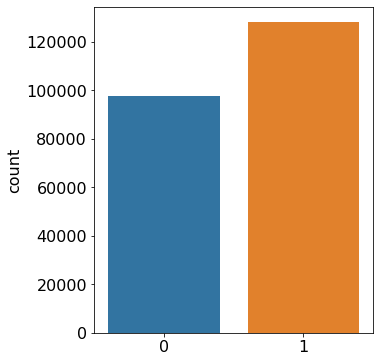

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,6))
sns.countplot(y)
plt.show()

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    import seaborn as sns
    from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
    from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
#     print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.rcParams.update({'font.size': 10})
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

### Generate Feature from CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.utils import to_categorical

In [ ]:
# deep learning model initialization
model = tf.keras.models.Sequential()  
model.add(Dense(1000,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

RF_X_train = model.predict(X_train)
RF_X_test = model.predict(X_test)

## Split training and testing data

## 1) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
qsvm=DecisionTreeClassifier()
qsvm.fit(RF_X_train,y_train) # training model on training dataset

DecisionTreeClassifier()

 **Evaluation of DT**

In [ ]:
y_pred=qsvm.predict(RF_X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QSVM-Classifier Bin-class Set-Accuracy is ", ac)

QSVM-Classifier Bin-class Set-Accuracy is  99.7164980420646


========== Decison Tree ==========

Accuracy on validation set: 0.9979

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24300
           1       1.00      1.00      1.00     32137

    accuracy                           1.00     56437
   macro avg       1.00      1.00      1.00     56437
weighted avg       1.00      1.00      1.00     56437



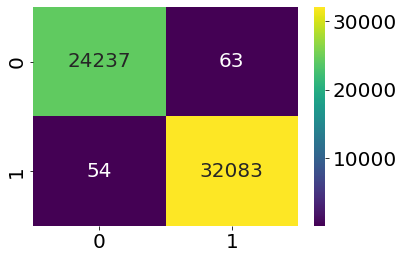

[0.9979268919325974,
 0.9979085730266367,
 0.9978635506091398,
 0.9978860349230715]

In [ ]:
# classification report
modelEvaluation(y_test, y_pred, 'Decison Tree')

## 2) KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(RF_X_train,y_train) # training model on training dataset

KNeighborsClassifier(n_neighbors=2)

### Evaluation of KNN

In [ ]:
y_pred=knn.predict(RF_X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Bin-class Set-Accuracy is ", ac)

KNN-Classifier Bin-class Set-Accuracy is  99.79268919325975


========== KNN Classifier ==========

Accuracy on validation set: 0.9979

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24300
           1       1.00      1.00      1.00     32137

    accuracy                           1.00     56437
   macro avg       1.00      1.00      1.00     56437
weighted avg       1.00      1.00      1.00     56437



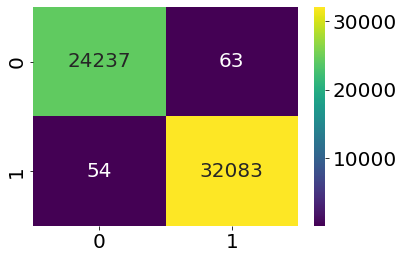

[0.9979268919325974,
 0.9979085730266367,
 0.9978635506091398,
 0.9978860349230715]

In [ ]:
modelEvaluation(y_test, y_pred, 'KNN Classifier')

## 3) Multi-Layer Perceptron

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()
# scaled_X_train = scale.fit_transform(X_train)
# scaled_y_train = scale.fit_transform(y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=128, input_dim=RF_X_train.shape[1], activation='relu'))
mlp.add(Dense(units=64, activation='relu'))
mlp.add(Dense(units=32, activation='relu'))
mlp.add(Dense(units=16, activation='relu'))
# mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=1,activation='sigmoid'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [ ]:
# mlp.summary()

In [ ]:
# training the model on training dataset
history = mlp.fit(RF_X_train, y_train, epochs=25, batch_size=64,validation_split=0.2)

Epoch 1/25
2117/2117 [==============================] - 5s 2ms/step - loss: 81.6611 - accuracy: 0.7985 - val_loss: 0.4800 - val_accuracy: 0.77724.3118 - accura
Epoch 2/25
2117/2117 [==============================] - 4s 2ms/step - loss: 2.1000 - accuracy: 0.8331 - val_loss: 0.4268 - val_accuracy: 0.8596oss: - ETA: 2s - los
Epoch 3/25
2117/2117 [==============================] - 3s 2ms/step - loss: 2.6313 - accuracy: 0.8814 - val_loss: 0.2769 - val_accuracy: 0.9180s: 3.3633 - accura - ETA: 1s - loss: 3 - ETA - ETA: 0s - loss: 2.6602 - accuracy: 0.88
Epoch 4/25
2117/2117 [==============================] - 3s 2ms/step - loss: 1.4702 - accuracy: 0.9173 - val_loss: 0.4845 - val_accuracy: 0.9205.2991 - accuracy: 
Epoch 5/25
2117/2117 [==============================] - 4s 2ms/step - loss: 1.0681 - accuracy: 0.9061 - val_loss: 0.8048 - val_accuracy: 0.92056 - accuracy:  - ETA: 0s
Epoch 6/25
2117/2117 [==============================] - 4s 2ms/step - loss: 0.7336 - accuracy: 0.8957 - val_loss: 1.

### Evaluation on MLP

In [ ]:
y_pred1 = mlp.predict(RF_X_test)
result = []
for i in y_pred1:
    if i > 0.5:
        result.append(1)
    else:
        result.append(0)

========== Multi-Layer Perceptron ==========

Accuracy on validation set: 0.8664

Classification report : 
               precision    recall  f1-score   support

           0       0.69      1.00      0.82     16854
           1       1.00      0.81      0.89     39583

    accuracy                           0.87     56437
   macro avg       0.85      0.90      0.86     56437
weighted avg       0.91      0.87      0.87     56437



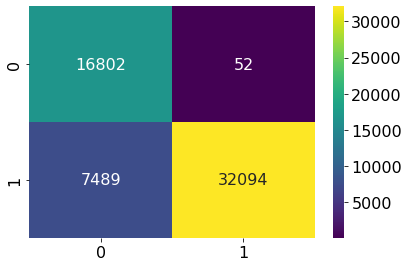

[0.8663819834505732,
 0.8450394467506626,
 0.9038586481465745,
 0.8557947678674263]

In [ ]:
# y_pred=mlp.predict(New_X_test)
modelEvaluation(y_test, result, 'Multi-Layer Perceptron')

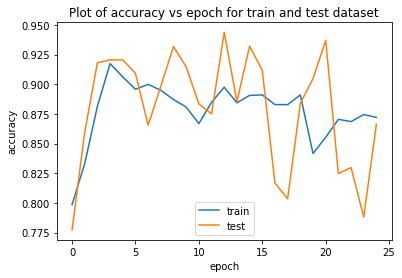

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.rcParams.update({'font.size': 10})
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

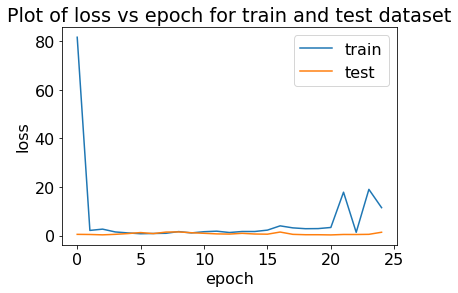

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

## 4) Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=RF_X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras mode
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                192       
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# fit the keras model on the dataset
history2 = model.fit(RF_X_train, y_train, epochs=25, batch_size=64,validation_split=0.2)


Epoch 1/25
2117/2117 [==============================] - 3s 1ms/step - loss: 465.8332 - accuracy: 0.7124 - val_loss: 21.3102 - val_accuracy: 0.7551 - accuracy: 0.
Epoch 2/25
2117/2117 [==============================] - 3s 1ms/step - loss: 18.1550 - accuracy: 0.8054 - val_loss: 39.3878 - val_accuracy: 0.8003
Epoch 3/25
2117/2117 [==============================] - 3s 1ms/step - loss: 13.0560 - accuracy: 0.8385 - val_loss: 15.2605 - val_accuracy: 0.7492- los - ETA: 0s - loss: 12.2248 - accu
Epoch 4/25
2117/2117 [==============================] - 3s 1ms/step - loss: 9.2948 - accuracy: 0.8623 - val_loss: 21.6344 - val_accuracy: 0.8499TA: 0s - loss: 9.0583 -  - ETA: 0s - loss: 9.4863 - accuracy: 0.
Epoch 5/25
2117/2117 [==============================] - 4s 2ms/step - loss: 6.4751 - accuracy: 0.8916 - val_loss: 2.7781 - val_accuracy: 0.8463
Epoch 6/25
2117/2117 [==============================] - 3s 2ms/step - loss: 3.7979 - accuracy: 0.9042 - val_loss: 1.7581 - val_accuracy: 0.9336
Epoch 7/25


### Evaluation on Neural Network

In [ ]:
y_pred2 = model.predict(RF_X_test)
result2 = []
for i in y_pred2:
    if i > 0.5:
        result2.append(1)
    else:
        result2.append(0)

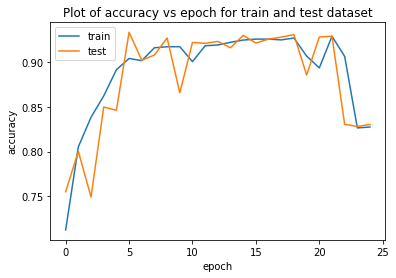

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.rcParams.update({'font.size': 10})
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

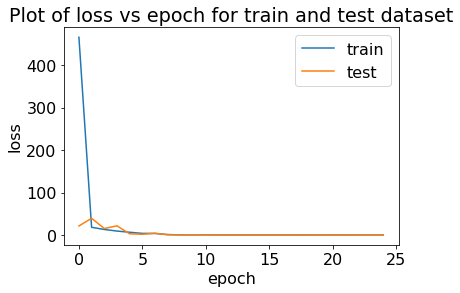

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

========== Neural Network ==========

Accuracy on validation set: 0.8318

Classification report : 
               precision    recall  f1-score   support

           0       0.62      0.99      0.76     15127
           1       0.99      0.77      0.87     41310

    accuracy                           0.83     56437
   macro avg       0.81      0.88      0.81     56437
weighted avg       0.89      0.83      0.84     56437



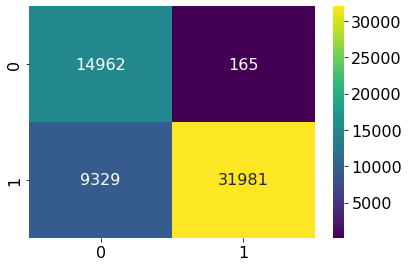

[0.8317770257100838, 0.8054077310751029, 0.881631627176839, 0.8149490636849364]

In [ ]:
# y_pred=mlp.predict(New_X_test)
modelEvaluation(y_test, result2, 'Neural Network')